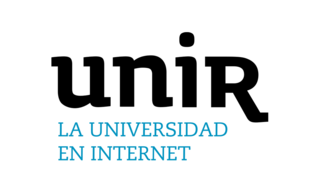

_Máster Universitario en Inteligencia Artificial_

_Trabajo Fin de Máster_

- Gustavo Mateos Santos
- gustavo.mateos830@comunidadunir.net

# Clasificación automática de estrellas variables con modelos Transformer aplicados a series temporales



In [2]:
# Install missing packages
%pip install torch lightkurve
%pip install -q pyarrow

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 13.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 34.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.1 MB/s eta 0:00:00 0:00:01
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11428 sha256=7a1c0c198fcd5b6d325211ca045f7e490a1f57d14f4fd405ac819d3c8488574e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filen

In [3]:
import torch, lightkurve as lk

print("Torch:", torch.__version__)
print("Lightkurve:", lk.__version__)

Torch: 2.2.2
Lightkurve: 2.5.0


## **Fase 2: Diseño e Implementación del Modelo Transformer**

Tras haber finalizado la **Fase 1 (Recopilación y preparación de datos)**, donde hemos generado un conjunto consolidado y etiquetado a partir de diversas misiones espaciales (Kepler, K2, TESS), el siguiente paso definido claramente en la memoria es la implementación de la **Fase 2**:

Aquí se menciona específicamente:

* **Arquitectura Transformer especializada**, adaptada a series temporales astronómicas.
* Implementación técnica con PyTorch en entorno local (VSCode).
* Exploración e incorporación de técnicas avanzadas:
  * Codificación posicional rotatoria (*Rotary Positional Encoding*).
  * Mecanismos de atención jerárquica (*Multi-head Self-Attention*).
  * Técnicas de *transfer learning* usando modelos preentrenados como **ASTROMER** para mejorar la generalización en casos de datos limitados o escasos.

### ⚙️ Pasos concretos ajustados al estado actual del trabajo:

1. **Preparación final del dataset consolidado** (*ya realizada con éxito*):
   * `all_missions_labeled.parquet` generado, validado y listo.

2. **Preprocesamiento para Modelo Transformer** (*inmediato*):
   * Normalización individual por curva (por ejemplo, estándar Z-Score o min-max).
   * Segmentación o padding de las curvas para homogeneizar longitud.
   * Opcional: generación de embeddings iniciales (si decides usar ASTROMER).

3. **Diseño Arquitectónico Inicial del Modelo**:
   * Entrada: secuencia temporal de magnitudes (+ potencialmente metadatos adicionales).
   * Embedding lineal inicial.
   * Codificación posicional rotatoria.
   * Bloques de atención jerárquica multi-cabezal.
   * Capas finales para clasificación multiclase usando salida "softmax".

4. **Implementación técnica**:
   * Desarrollo del modelo en PyTorch (en tu entorno local VSCode ya configurado).
   * Uso de GPU en AWS SageMaker para entrenamientos largos o con muchos datos.

5. **Entrenamiento y validación inicial del modelo**:
   * División del dataset en entrenamiento, validación y prueba.
   * Evaluación sistemática usando métricas definidas (Accuracy, Recall, F1-score).

El paso más lógico y urgente, dado el avance actual, es comenzar inmediatamente la implementación técnica del modelo Transformer descrito anteriormente. De hecho, sería idóneo empezar con un script base (`script_8_train_transformer.py`) en PyTorch que:

* Cargue datos desde el fichero final consolidado (`all_missions_labeled.parquet`).
* Realice la normalización y segmentación (preprocesamiento).
* Construya la arquitectura Transformer básica propuesta.
* Ejecute entrenamiento inicial y validación para comprobar su funcionamiento.

#### 🚨 Consideración importante sobre transfer learning:

En la memoria se destaca claramente la relevancia del uso de modelos preentrenados, particularmente **ASTROMER**, para aprovechar embeddings preaprendidos y mejorar la generalización del modelo. Se recomendaría evaluar claramente incorporar este paso desde ahora, ya que podría acelerar la convergencia del entrenamiento y mejorar resultados iniciales.

#### 📋 Plan posterior (según tu TFM):

Tras la implementación y validación básica del Transformer, seguirían:

* **Fase 3**: Evaluación experimental comparativa contra CNN y LSTM.
* **Fase 4**: Evaluación de robustez ante incertidumbres (curvas incompletas, ruido, muestreo irregular).
* **Fase 5**: Análisis crítico, síntesis y propuestas futuras de mejora.



#### 📚 **1. Citación del uso de ASTROMER en la Memoria (Capítulo 6)**

Correcto. El uso de ASTROMER debe ser claramente citado en la memoria del TFM. En el capítulo 6, donde describas el diseño e implementación del modelo, deberías incluir explícitamente algo similar a:

> Para aprovechar las ventajas del aprendizaje por transferencia en series temporales astronómicas, se ha utilizado el modelo preentrenado **ASTROMER** desarrollado por Fang et al. (2022), disponible públicamente en el repositorio de GitHub ([https://github.com/IShengFang/ASTROMER](https://github.com/IShengFang/ASTROMER)).

Luego, en la bibliografía añadirás la referencia completa, por ejemplo en formato APA:

> Fang, I. S., Teyssier, D., & Longo, G. (2022). **ASTROMER**: A Transformer-based Embedding for Astronomical Time Series. Recuperado de [https://github.com/IShengFang/ASTROMER](https://github.com/IShengFang/ASTROMER)

Esto garantiza la transparencia y buenas prácticas en tu trabajo académico.

In [ ]:
import pyarrow.dataset as ds
import pandas as pd

# Configuración
DATASET_PATHS = [
    "data/processed/all_missions_labeled.parquet",
    "data/processed/dataset_gaia_complemented_normalized.parquet"
]
dataset = ds.dataset(DATASET_PATHS, format="parquet")
scanner = dataset.scanner(columns=["id_objeto"])

lengths = []
for batch in scanner.to_batches():
    df_batch = batch.to_pandas()
    lengths.append(df_batch.groupby('id_objeto').size())

all_lengths = pd.concat(lengths)
print(all_lengths.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))


count     26437.000000
mean       9514.005523
std        7929.330408
min           3.000000
50%        8242.000000
75%       13771.000000
90%       17275.000000
95%       19273.400000
99%       36005.720000
max      131072.000000
dtype: float64



📌 **Adaptaciones necesarias para la memoria del TFM (capítulo 6):**

En la próxima redacción de tu capítulo 6 debes mencionar explícitamente:

-   **Cambio de ASTROMER a AstroConformer** (motivado por disponibilidad).
-   **Justificación técnica** del uso de máscaras de atención (gestión eficiente de curvas de longitud variable).
-   **Detalles técnicos de implementación** de AstroConformer y la gestión eficiente de memoria usando PyArrow.

#### 🎓 Objetivo del TFM:

**Entrenar tu propio Transformer sobre curvas de luz completas**, usando **transfer learning con AstroConformer**.

#### ¿Qué significa entonces aplicar *transfer learning* desde AstroConformer?

1. **Usar AstroConformer preentrenado como bloque de codificación de secuencias**:

   * No lo usas solo como extractor de un vector resumen por curva.
   * Lo usas **para procesar secuencias completas**: pasa la curva entera, y extrae **embeddings intermedios** (por ejemplo, las salidas de cada paso de tiempo).

2. **Congelar o afinar (fine-tune) sus pesos** durante el entrenamiento de tu modelo.

   * Si congelas: aprovechas lo aprendido sin tocarlo.
   * Si haces fine-tuning: permites que se adapte a tu nuevo conjunto de clases.

3. **Añadir una cabeza de clasificación propia** sobre el output del encoder de AstroConformer.

   * Es decir, el modelo final sería algo como:

     ```
     curva de luz --> AstroConformer --> [CLS] embedding o secuencia completa --> capa lineal --> clases
     ```

La **opción correcta** en lugar de usar *nuestro propio Transformer desde cero*, el **bloque encoder será AstroConformer**, cargado con pesos preentrenados.

En `script_2_transformer_training.py`:

* Cargas AstroConformer como `encoder`.
* Le pasas `x` y `mask` como entrada.
* Añades tu cabeza de clasificación (`nn.Linear(...)`).
* Entrenas usando `train_loader` y `val_loader`.

In [1]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing import main as transformer_preprocessing

# Ejecutar una prueba limitada a 200 objetos
train_loader, val_loader = transformer_preprocessing(
    seq_length=20000,
    batch_size=64,
    num_workers=8,
    limit_objects=200,
    device="cpu"
)


📂 Cargando datos en lotes con PyArrow...
🔍 Limitando procesamiento a los primeros 200 objetos
🚀 Procesando 200 curvas en paralelo usando 8 CPUs...
✅ Datos preparados como secuencias normalizadas y máscaras.


**Validación del primer batch de entrenamiento**:

In [1]:
# Extraer el primer batch del loader
for batch in train_loader:
    x, y, mask = batch
    print("🔍 Batch de entrenamiento:")
    print(f"- x.shape       : {x.shape}")
    print(f"- y.shape       : {y.shape}")
    print(f"- mask.shape    : {mask.shape}")
    print(f"- x[0, :10]     : {x[0, :10]}")  # primeros 10 pasos de la curva 0
    print(f"- mask[0, :20]  : {mask[0, :20]}")  # primeros 20 elementos de la máscara
    print(f"- y[0] (clase)  : {y[0]}")
    break  # solo inspeccionar el primer batch


NameError: name 'train_loader' is not defined

| Variable    | Forma esperada             | Resultado     | ✅ Estado |
| ----------- | -------------------------- | ------------- | -------- |
| `x`         | `(batch_size, seq_length)` | `(64, 20000)` | ✅ Ok     |
| `mask`      | `(batch_size, seq_length)` | `(64, 20000)` | ✅ Ok     |
| `y`         | `(batch_size,)`            | `(64,)`       | ✅ Ok     |
| `x[0][:10]` | valores normalizados       | valores ∈ ℝ   | ✅ Ok     |
| `mask[0]`   | 1s en datos reales         | todo `1.0`    | ✅ Ok     |


**Comprobacion de número de objetos únicos entre los dos datasets**:

In [4]:
import pyarrow.dataset as ds

# Configuración
DATASET_PATHS = [
    "data/processed/all_missions_labeled.parquet",
    "data/processed/dataset_gaia_complemented_normalized.parquet"
]
# Dataset streaming por lotes
dataset = ds.dataset(DATASET_PATHS, format="parquet")

scanner = dataset.scanner(columns=["id_objeto"])
unique_ids = set()

for batch in scanner.to_batches():
    df = batch.to_pandas()
    unique_ids.update(df["id_objeto"].dropna().unique())

print(f"🔎 Objetos únicos detectados: {len(unique_ids)}")


🔎 Objetos únicos detectados: 15080


**Ejecución para todos los objetos**:

In [ ]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing_optimizado_2 import main as transformer_preprocessing_optimizado2

# Ejecutar una prueba con todos los objetos y SEQ_LENGTH=25000
train_loader, val_loader = transformer_preprocessing_optimizado2(
    seq_length=25000,
    batch_size=64,
    num_workers=8,
    device="cpu",
    limit_objects=None,
    max_per_class=None
)

📂 Cargando datos en lotes con PyArrow...


Agrupando curvas por objeto: 1127351batch [42:05, 446.35batch/s]


🚀 Procesando 15080 curvas en paralelo usando 8 CPUs...
📊 Recuento por clase codificada:
 4 (Other): 4417
 2 (Eclipsing Binary): 6317
 6 (Rotational): 2117
 1 (Delta Scuti): 197
 3 (Irregular): 105
 7 (Variable): 113
 5 (RR Lyrae): 32
 8 (White Dwarf): 7
 9 (Young Stellar Object): 16
 0 (Cataclysmic): 9

📉 Resumen de curvas descartadas:
🔸 All nan                       : 0
🔸 Low std                       : 0
🔸 Short curve                   : 0
🔸 Nan or inf after norm         : 0
🔸 Ok                            : 0
✅ Datos preparados como secuencias normalizadas y máscaras.


**Guardado de los datasets de la celda anterior, serializados para poder recuperarlos si se reinicia el Kernel**: 

In [3]:
import torch

# Guardar datasets serializados para no perderlos al reiniciar el kernel
torch.save(train_loader.dataset, "data/train/train_dataset.pt")
torch.save(val_loader.dataset, "data/train/val_dataset.pt")

🧠 `script_2_transformer_training.py`:

#### ✅ ¿Qué hace este script?

1. Carga **AstroConformer** como encoder con la configuración oficial (`default_config.yaml`).
2. Añade una **capa lineal de clasificación**.
3. Utiliza los **DataLoaders preparados** (`train_loader`, `val_loader`).
4. Soporta entrenamiento en **CPU o GPU (`device`)**.
5. Muestra **métricas detalladas** por clase en validación.

In [ ]:
# Mostrar clases codificadas presentes en el dataset
clase_ids_unicos = sorted(set([y.item() for _, y, _ in train_loader.dataset]))
print(f"🎯 Clases codificadas presentes en train_loader: {clase_ids_unicos}")
print(f"🔢 Número de clases distintas detectadas: {len(clase_ids_unicos)}")

clase_ids_unicos = sorted(set([y.item() for _, y, _ in val_loader.dataset]))
print(f"🎯 Clases codificadas presentes en val_loader: {clase_ids_unicos}")
print(f"🔢 Número de clases distintas detectadas: {len(clase_ids_unicos)}")

🎯 Clases codificadas presentes en train_loader: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
🔢 Número de clases distintas detectadas: 10
🎯 Clases codificadas presentes en val_loader: [1, 2, 3, 4, 5, 6, 7, 8, 9]
🔢 Número de clases distintas detectadas: 9


In [ ]:
import torch
import numpy as np

train_dataset = torch.load("data/train/train_dataset.pt", weights_only=False)
val_dataset = torch.load("data/train/val_dataset.pt", weights_only=False)

# Comprobar si hay valores infinitos en el dataset de entrenamiento
# y mostrar estadísticas de los tensores
print("🔍 Comprobando valores infinitos en el dataset de entrenamiento...")
for i in range(len(train_dataset)):
    x, y, mask = train_dataset[i]
    if torch.isinf(x).any():
        print(f"⚠️ Inf detectado en muestra {i} (clase {y})")
        print(f"x.mean: {x.mean()}, std: {x.std()}, max: {x.max()}, min: {x.min()}")

# Comprobar si hay valores infinitos en el dataset de validación
print("🔍 Comprobando valores infinitos en el dataset de validación...")
for i in range(len(val_dataset)):
    x, y, mask = val_dataset[i]
    if torch.isinf(x).any():
        print(f"⚠️ Inf detectado en muestra {i} (clase {y})")
        print(f"x.mean: {x.mean()}, std: {x.std()}, max: {x.max()}, min: {x.min()}")


🔍 Comprobando valores infinitos en el dataset de entrenamiento...
🔍 Comprobando valores infinitos en el dataset de validación...


#### ✅ SITUACIÓN ACTUAL (consolidada)

🧱 Dataset unificado: `all_missions_labeled.parquet`

Generado con el script `script_6_unify_all_missions.py`, a partir de:

| Dataset                            | Incluido | Motivo                                       |
| ---------------------------------- | -------- | -------------------------------------------- |
| `dataset_eb_kepler_labeled_fixed`  | ✅        | Curvas reales Kepler + etiquetas EB          |
| `dataset_eb_tess_labeled_fixed`    | ✅        | Curvas reales TESS + etiquetas EB            |
| `dataset_k2varcat_labeled_fixed`   | ✅        | Curvas reales K2 + clases variadas           |
| `dataset_vsx_tess_labeled_fixed`   | ✅        | Curvas reales TESS cruzadas con VSX          |
| `dataset_gaia_dr3_vsx_tic_labeled` | ❌        | ⚠️ No contiene curvas (`tiempo`, `magnitud`) |

🔍 **Resultado:**
📊 `all_missions_labeled.parquet` incluye **todas las curvas reales necesarias**, y tiene la columna `clase_variable_normalizada`.

✅ El CSV de resumen muestra una buena base para RR Lyrae (362.000), WD (508.000), DSCT (2.7M), etc.

🔄 ¿Es necesario volver a ampliar o reetiquetar?

**No.** Dado que:

* Ya hicimos el paso de normalización de clases en el script 6
* El CSV muestra que sí tienes miles de curvas etiquetadas para las clases minoritarias que antes faltaban
* El `.parquet` final unificado los contiene

❗ ¿Entonces por qué no aparecen esas clases?

Porque el problema está en la **fase de preprocesado**, donde solo se incluyeron:

```text
 7033 → Eclipsing Binary  
 4970 → Other  
 1139 → Rotational  
   98 → Delta Scuti  
   19 → RR Lyrae  
    4 → White Dwarf  
```
Es decir, aunque el `.parquet` contiene decenas de miles de ejemplos de RR Lyrae, WD, DSCT, etc., **no se incluyeron durante la generación de secuencias** (`script_1_transformer_preprocessing.py`).

✅ Próximo paso: regenerar dataset con clases balanceadas

1. Adaptar `script_1_transformer_preprocessing.py` -> `script_1_transformer_preprocessing_optimizado.py`
2. Añadir un filtro que **igualice o limite el número de curvas por clase**
   * Por ejemplo: `max_per_class = 100.000`
3. Tomar **una muestra estratificada por clase\_variable\_normalizada**
4. Proceder como antes, y guardar el nuevo `.pt`

In [ ]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing_optimizado_2 import main as transformer_preprocessing_optimizado2

# Ejecutar una prueba con todos los objetos y SEQ_LENGTH=25000
train_loader, val_loader = transformer_preprocessing_optimizado2(
    seq_length=25000,
    batch_size=64,
    num_workers=8,
    device="cpu",
    limit_objects=None,
    max_per_class=None
)

📂 Cargando datos en lotes con PyArrow...


⚠️ No se ha aplicado balanceo por clase (max_per_class=None). Algunas clases pueden estar sobrerrepresentadas.
🚀 Procesando 13415 curvas en paralelo usando 4 CPUs...
📊 Recuento por clase codificada:
 2 (Eclipsing Binary): 7020
 4 (Other): 4969
 6 (Rotational): 1143
 1 (Delta Scuti): 100
 7 (Variable): 44
 3 (Irregular): 51
 9 (Young Stellar Object): 11
 5 (RR Lyrae): 19
 0 (Cataclysmic): 3
 8 (White Dwarf): 4

📉 Resumen de curvas descartadas:
🔸 All nan                       : 0
🔸 Low std                       : 0
🔸 Short curve                   : 0
🔸 Nan or inf after norm         : 0
🔸 Ok                            : 0
✅ Datos preparados como secuencias normalizadas y máscaras.


In [ ]:
import torch

# Guardar datasets serializados para no perderlos al reiniciar el kernel
torch.save(train_loader.dataset, "data/train/train_dataset.pt")
torch.save(val_loader.dataset, "data/train/val_dataset.pt")

**Refuerzo del fine-tuning (en SageMaker) a partir de los errores detectados en la primera ronda**:

Estos errores estan en `data\outputs\errores_mal_clasificados_con_id.csv`

In [1]:
%run src/fase1/script_6d_refuerzo_desde_errores.py

📥 Leyendo errores desde outputs\errores_mal_clasificados_con_id.csv
🔍 IDs a extraer: 1,226
📦 Cargando datasets originales...


Agrupando curvas por objeto: 1127351batch [44:18, 424.02batch/s]


🎯 Extrayendo solo curvas asociadas a errores...
✅ Dataset de refuerzo guardado en: data\processed\dataset_refuerzo_desde_errores.parquet (160,275 filas)


#### El siguiente bloque (entrenamiento y fine-tuning) lo hacemos en el notebook de la fase 2 para SageMaker, no aqui en local, para aprovechar procesamiento GPU.

In [3]:
import pandas as pd

# Cargar CSV con errores y dataset de refuerzo
errores = pd.read_csv("outputs/errores_mal_clasificados_con_id.csv")
df_refuerzo = pd.read_parquet("data/processed/dataset_refuerzo_desde_errores.parquet")

# Normalizar id_objeto
errores["id_objeto"] = errores["id_objeto"].astype(str)
df_refuerzo["id_objeto"] = df_refuerzo["id_objeto"].astype(str)

# Comparar
ids_errores = set(errores["id_objeto"])
ids_refuerzo = set(df_refuerzo["id_objeto"])
ids_comunes = ids_errores.intersection(ids_refuerzo)

print(f"🔎 IDs únicos en errores: {len(ids_errores)}")
print(f"📦 IDs únicos en refuerzo: {len(ids_refuerzo)}")
print(f"✅ IDs comunes entre ambos: {len(ids_comunes)}")

# Mostrar algunos ejemplos
print("\nEjemplos:")
print(sorted(list(ids_comunes))[:10])

df_debug = pd.read_csv("data/train/debug_clases_codificadas.csv")
ids_train = set(df_debug["id_objeto"].astype(str))

ids_finales_para_agregar = ids_comunes - ids_train
print(f"📈 IDs candidatos a agregar (errores no presentes en train): {len(ids_finales_para_agregar)}")



🔎 IDs únicos en errores: 1226
📦 IDs únicos en refuerzo: 1226
✅ IDs comunes entre ambos: 1226

Ejemplos:
['KIC_10004546', 'KIC_10006096', 'KIC_10007533', 'KIC_10014536', 'KIC_10015516', 'KIC_10019399', 'KIC_10019763', 'KIC_10024144', 'KIC_10026457', 'KIC_10028352']
📈 IDs candidatos a agregar (errores no presentes en train): 0


In [1]:
%run src/fase1/script_6e_combina_refuerzo.py

🗓️ Cargando datasets existentes...
🔍 Cargando dataset de refuerzo...
📂 Cargando IDs de errores conocidos y entrenamiento...
📊 Total errores: 1226, en train: 0, candidatos: 1226
🔹 1226 curvas candidatas desde refuerzo


100%|██████████| 1226/1226 [00:01<00:00, 1063.06it/s]

✅ 0 nuevas curvas se agregarán al entrenamiento
⚠️ No se han añadido nuevas curvas. Se mantienen los datasets originales.


In [5]:
import torch
dataset = torch.load("data/train/train_dataset_orig.pt", weights_only=False)
print(f"✅ Dataset original cargado (4.2GB). Longitud: {len(dataset)}")

dataset = torch.load("data/train/train_dataset.pt", weights_only=False)
print(f"✅ Dataset nuevo cargado (2.3GB). Longitud: {len(dataset)}")


✅ Dataset original cargado (4.2GB). Longitud: 10664
✅ Dataset nuevo cargado (2.3GB). Longitud: 11731


In [6]:
import torch
dataset = torch.load("data/train/train_dataset.pt", weights_only=False)

# Inspecciona las 5 primeras curvas
for i in range(5):
    x, y, m = dataset[i]
    print(f"Curva {i}: shape={x.shape}, dtype={x.dtype}, label={y}, mask_mean={m.float().mean().item():.3f}")


Curva 0: shape=torch.Size([25000]), dtype=torch.float32, label=2, mask_mean=0.002
Curva 1: shape=torch.Size([25000]), dtype=torch.float32, label=2, mask_mean=0.007
Curva 2: shape=torch.Size([25000]), dtype=torch.float32, label=2, mask_mean=0.009
Curva 3: shape=torch.Size([25000]), dtype=torch.float32, label=6, mask_mean=0.002
Curva 4: shape=torch.Size([25000]), dtype=torch.float32, label=4, mask_mean=0.006


c:\Users\hav3f\OneDrive - UNIR\MASTER UNIR - INTELIGENCIA ARTIFICIAL\ASIGNATURAS\CUATRIMESTRE 2\TRABAJO FIN DE MASTER\IMPLEMENTACION\src\fase2\script_1_transformer_preprocessing_optimizado.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.sequences[idx], dtype=torch.float32),
c:\Users\hav3f\OneDrive - UNIR\MASTER UNIR - INTELIGENCIA ARTIFICIAL\ASIGNATURAS\CUATRIMESTRE 2\TRABAJO FIN DE MASTER\IMPLEMENTACION\src\fase2\script_1_transformer_preprocessing_optimizado.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.labels[idx], dtype=torch.long),
c:\Users\hav3f\OneDrive - UNIR\MASTER UNIR - INTELIGENCIA ARTIFICIAL\ASIGNATURAS\CUATRIMESTRE 2\TRABAJO FI

### **NUEVO PREPROCESADO CON BALANCEADO DE CLASES**:

`script_1_transformer_preprocessing_optimizado_balanceado.py`

✅ MEJORAS INCLUIDAS

1. Activación clara de balanceo por clase:
    - Usando --max_per_class 1000 puedes limitar clases dominantes.
    - Las clases minoritarias quedan incluidas hasta su máximo natural.

2. Reporte claro de clases limitadas y no limitadas:
    - Se imprime cuántas curvas por clase se han incluido y si fueron truncadas.

3. Mensajes explícitos para trazabilidad de la selección.

In [1]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing_optimizado_2 import main as transformer_preprocessing_optimizado2

# Ejecutar una prueba con todos los objetos y SEQ_LENGTH=25000
train_loader, val_loader = transformer_preprocessing_optimizado2(
    seq_length=25000,
    batch_size=64,
    num_workers=8,
    device="cpu",
    limit_objects=None,
    max_per_class=10000
)

📂 Cargando datos en lotes con PyArrow...


Agrupando curvas por objeto: 1127351batch [31:04, 604.73batch/s]


🚀 Procesando 15080 curvas en paralelo usando 8 CPUs...
📊 Recuento por clase codificada:
 4 (Other): 4417
 2 (Eclipsing Binary): 6317
 7 (Variable): 113
 6 (Rotational): 2117
 3 (Irregular): 105
 1 (Delta Scuti): 197
 9 (Young Stellar Object): 16
 5 (RR Lyrae): 32
 0 (Cataclysmic): 9
 8 (White Dwarf): 7

📉 Resumen de curvas descartadas:
🔸 All nan                       : 0
🔸 Low std                       : 0
🔸 Short curve                   : 0
🔸 Nan or inf after norm         : 0
🔸 Ok                            : 0
✅ Datos preparados como secuencias normalizadas y máscaras.


In [2]:
import torch

# Guardar datasets serializados para no perderlos al reiniciar el kernel y poder subirlos a SageMaker
torch.save(train_loader.dataset, "data/train/train_dataset.pt")
torch.save(val_loader.dataset, "data/train/val_dataset.pt")